In [1]:

# installing packages for arabic words correction 
!pip install pyarabic
!pip install pyaspeller
!pip install arabic-reshaper
!pip install python-bidi
!pip install matplotlib wordcloud pandas

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os


import re # regular expression libary.
import nltk # Natural Language toolkit
nltk.download("stopwords")  #downloading stopwords
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp



# for reshaping and displaying Arabic text in plots
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

# Replace 'path_to_arabic_font.ttf' with the actual path to your installed Arabic font
arabic_font_path = '/kaggle/input/font-dataset/FontScripts/Arabic.ttf'
arabic_font = fm.FontProperties(fname=arabic_font_path)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import scipy
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos ,pi,arange
from scipy.fftpack import fft ,ifft
import scipy.signal
from sklearn.preprocessing import LabelEncoder

from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

In [ ]:
print("hello")

In [123]:
# df.head(5)

,title,author,story,topic,date,words_length,letters_length
0,شهاد طبيب جراح رط قنصل تر صبع مس,هسبريس من الدار البيضاء,قرر غرف جناء مح استءناف مد دار يضاء مواصل مناق...,faits-divers,2020-10-02 20:08:00,150,635
1,حباط هريب طن حشيش كادير,رشيد بيجيكن من أكادير,مك مصلح اء شرط قضاء مد ادير ضوء معلوم دقيق فر ...,faits-divers,2020-10-02 19:37:00,118,523
2,مي صوير سقط شب هجر ظام,ابراهيم مغراوي من مراكش,وقف عناصر رق شرط قضاء منطق قليم من مد صوير خمي...,faits-divers,2020-10-02 18:35:00,92,410
3,تلميذ زاكور هم زوج خت استغلال جنس,هسبريس من زاكورة,شف مصدر مسءول تلميذ متحدر جماع زول قليم زاكور ...,faits-divers,2020-10-02 14:20:00,93,415
4,حجار ريم مزيف رط شخاص مد ادير,رشيد بيجيكن من أكادير,مك عناصر مصلح اء شرط قضاء مد ادير اربعاء قيف ش...,faits-divers,2020-10-02 10:05:00,78,335


In [124]:
stories =  glob('../input/hespress/stories*')

In [125]:
data = [pd.read_csv(story,encoding='utf8') for story in stories]

In [126]:


# Create an empty list to store the last 20% of each DataFrame
last_20_percent_data = []

 #Iterate through each DataFrame, take the last 20%, and store in the list
for df1 in data:
    num_rows = int(len(df1) * 0.2)  # Calculate the number of rows corresponding to 20%
    last_20_percent_df = df1.tail(num_rows)  # Slice the DataFrame to get the last 20% of rows
    last_20_percent_data.append(last_20_percent_df)

# Step 6: Concatenate all the DataFrames into one DataFrame
test_dataframe = pd.concat(last_20_percent_data, ignore_index=True)

# Print the final DataFrame
test_dataframe

,Unnamed: 0,id,title,date,author,story,topic
0,800,219d8aae04fc11ebb8d7646e69d991ea,العثور على رضيع متخلى عنه وسط مدينة مكناس,السبت 27 يونيو 2020 - 22:45,رشيد الكويرتي,عُثر، مساء السبت، على رضيع حديث الولادة متخلى ...,faits-divers
1,801,22b2661c04fc11ebacce646e69d991ea,تفكيك شبكة إجرامية وحجز أسلحة نارية بالعيون,السبت 27 يونيو 2020 - 20:51,هسبريس من الرباط,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,802,249b98f404fc11eb92b6646e69d991ea,عناصر الأمن تضبط شخصا هدّد باقتراف جرائم قتل,السبت 27 يونيو 2020 - 19:14,هسبريس من الرباط,أوقفت عناصر الفرقة الوطنية للشرطة القضائية، بت...,faits-divers
3,803,25e8969e04fc11eba17a646e69d991ea,شاحنة تدهس ثمانينيا وترديه قتيلا ضواحي الريش,السبت 27 يونيو 2020 - 16:15,هسبريس من ميدلت,استقبل مستودع الأموات بالمستشفى المحلي بمدينة ...,faits-divers
4,804,270f526e04fc11ebb67f646e69d991ea,جريمة قتل تجرّ زوجة إلى القضاء بمدينة ميدلت,السبت 27 يونيو 2020 - 06:54,هسبريس من ميدلت,تعرض زوج يبلغ من العمر 47 سنة لطعنة سكين على م...,faits-divers
...,...,...,...,...,...,...,...
2195,995,a56180e804f311eb99f7646e69d991ea,188 أستاذا لتدريس العربية لأبناء مغاربة العالم,السبت 12 ماي 2018 - 23:25,هسبريس من الرباط,أعلنت وزارة التربية الوطنية والتكوين المهني وا...,marocains-du-monde
2196,996,a67a5ac604f311eb983a646e69d991ea,الحروشي .. قاض مغربي ينتصر للعدل في المحكمة ال...,السبت 12 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,لا يلفظ اسم العربي الحروشي في سلطنة عمان إلا و...,marocains-du-monde
2197,997,a788167404f311eb91c0646e69d991ea,غزلان الصيابري .. مغربية تعتلي قمّة المال والأ...,الجمعة 11 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,طال المقام بالمغربية غزلان الصيابري في تجربة ا...,marocains-du-monde
2198,998,a8d5e94004f311ebab70646e69d991ea,هشام تسمارت .. صحافي مغربي ينفتح على الرواية ف...,الخميس 10 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,يعيش هشام تسمارت أواخر سنين العقد الثالث من حي...,marocains-du-monde


In [127]:
test_dataframe.to_csv('test.csv',index = False,encoding = 'utf-8')

In [65]:
len(stories)

11

In [66]:
df = pd.concat(data)

In [67]:
months = ['يناير','فبراير','مارس','إبريل','مايو','يونيو','يوليو','أغسطس','سبتمبر','أكتوبر','نوفمبر','ديسمبر']
# months[1]
monthToNum  = {}

for month in range(12):
    monthToNum[months[month]] = month+1
    

monthToNum

{'يناير': 1,
 'فبراير': 2,
 'مارس': 3,
 'إبريل': 4,
 'مايو': 5,
 'يونيو': 6,
 'يوليو': 7,
 'أغسطس': 8,
 'سبتمبر': 9,
 'أكتوبر': 10,
 'نوفمبر': 11,
 'ديسمبر': 12}

In [68]:
import pyarabic.araby as araby
import pyaspeller
import arabic_reshaper
from bidi.algorithm import get_display

#spell_checker = pyaspeller.Aspeller(lang='ar')

def arabic_spell_check(word):
    return spell_checker.spell(word)

def levenshtein_distance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for index2, char2 in enumerate(s2):
        new_distances = [index2 + 1]
        for index1, char1 in enumerate(s1):
            if char1 == char2:
                new_distances.append(distances[index1])
            else:
                new_distances.append(1 + min((distances[index1], distances[index1 + 1], new_distances[-1])))
        distances = new_distances

    return distances[-1]

def arabic_auto_correct(word, vocabulary):

    min_distance = float('inf')
    corrected_word = word

    for correct_word in vocabulary:
        distance = levenshtein_distance(word, correct_word)
        if distance < min_distance:
            min_distance = distance
            corrected_word = correct_word

    return corrected_word

def reshape_and_display(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# Test auto-correction
vocabulary = months
input_word = "شتنبر"

# #corrected_word = 
# print("Input Word: ", (input_word))
# print("Auto-Corrected Word: ", (corrected_word))
#print("Is Correct Word Spelled Correctly?: ", arabic_spell_check(corrected_word))


In [69]:

# # Sample data
# data = {
#     'Arabic_Date': ['الجمعة 02 أكتوبر 2020 - 23:1']
# }

# Convert Arabic date to Gregorian date
def arabic_to_gregorian(arabic_date):
    date_parts = arabic_date.split(' ')
    day = int(date_parts[1])
    #correct wrong month words like شتنبر  should be سبتمبر
    monthName = arabic_auto_correct(date_parts[2], vocabulary)
    month = monthToNum[monthName]
    year = int(date_parts[3])
    time_parts = date_parts[5].split(':')
    hour = int(time_parts[0])
    minute = int(time_parts[1])
    return f"{year}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}:00"
    
    
def convertDateTime(df):
    df['Gregorian_Date'] = df['date'].apply(arabic_to_gregorian)

    # Convert Gregorian date to pandas datetime
    df['Gregorian_Date'] = pd.to_datetime(df['Gregorian_Date'])





# Display the DataFrame
#df = pd.DataFrame(data)
# print(df['Gregorian_Date'])
convertDateTime(df)

In [70]:
df

,Unnamed: 0,id,title,date,author,story,topic,Gregorian_Date
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers,2020-10-02 20:08:00
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers,2020-10-02 19:37:00
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers,2020-10-02 18:35:00
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers,2020-10-02 14:20:00
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers,2020-10-02 10:05:00
...,...,...,...,...,...,...,...,...
995,995,a56180e804f311eb99f7646e69d991ea,188 أستاذا لتدريس العربية لأبناء مغاربة العالم,السبت 12 ماي 2018 - 23:25,هسبريس من الرباط,أعلنت وزارة التربية الوطنية والتكوين المهني وا...,marocains-du-monde,2018-05-12 23:25:00
996,996,a67a5ac604f311eb983a646e69d991ea,الحروشي .. قاض مغربي ينتصر للعدل في المحكمة ال...,السبت 12 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,لا يلفظ اسم العربي الحروشي في سلطنة عمان إلا و...,marocains-du-monde,2018-05-12 06:00:00
997,997,a788167404f311eb91c0646e69d991ea,غزلان الصيابري .. مغربية تعتلي قمّة المال والأ...,الجمعة 11 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,طال المقام بالمغربية غزلان الصيابري في تجربة ا...,marocains-du-monde,2018-05-11 06:00:00
998,998,a8d5e94004f311ebab70646e69d991ea,هشام تسمارت .. صحافي مغربي ينفتح على الرواية ف...,الخميس 10 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,يعيش هشام تسمارت أواخر سنين العقد الثالث من حي...,marocains-du-monde,2018-05-10 06:00:00


In [128]:
test_dataframe.drop(columns = ['Unnamed: 0','id','date','title'],inplace = True)

In [71]:
df.drop(columns = ['Unnamed: 0','id','date'],inplace = True)

In [72]:
df = df.rename(columns = {'Gregorian_Date':'date'})

In [73]:
df.to_csv('concatData.csv',index = False,encoding = 'utf8')

In [ ]:
df =pd.read_csv('/kaggle/working/cleaned_data.csv',encoding = 'utf8')

# PreProcessing

## Removing stop Words and normalize text

In [15]:
!pip install tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 7.5 MB/s eta 0:00:00


In [37]:
## Remove punctuations

def normalize_stop_words(stops):
    
    new_stop = []
    for text in stops:
        text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
        ## remove extra whitespace
        text = re.sub('\s+', ' ', text)  

        ## Convert text to lowercases
        text = text.lower()

        ## Remove stop words
        text = remove_stop_words(text)
        ## Remove numbers
        text = re.sub("\d+", " ", text)
        ## Remove Tashkeel
        text = normalizeArabic(text)
        text = re.sub('[A-Za-z]+',' ',text)
        text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
        ## remove extra whitespace
        text = re.sub('\s+', ' ', text)  
        #Stemming
        text = stem(text)

        text = re.sub(r'\bو\b','',text)
        new_stop.append(text)
    
    return stops

In [113]:
from nltk.corpus import stopwords
from textblob import TextBlob
import re

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

stops = set(stopwords.words("arabic"))
stop_word_comp = {'حول','عبر','حاله',"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()

def stem(text,lemmitize = True):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        if lemmitize==False:
            cleaned.append(ArListem.get_stem())
        else:    
            cleaned.append(ArListem.get_root())
        
    return " ".join(cleaned)

import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    #Normalizing some letters to standard value
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    
    #removing the tashkeel characters
    noise = re.compile(""" ّ    | 
                             َ    | 
                             ً    | 
                             ُ    | 
                             ٌ    | 
                             ِ    | 
                             ٍ    | 
                             ْ    | 
                             ـ     
                         """, re.VERBOSE)
    
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)


def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stp.stopwords_list() and not w in stop_word_comp and len(w) >= 2])


def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    
    ## Convert text to lowercases
    text = text.lower()
    
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    text = stem(text)
    return text



In [171]:
string_columns = [col for col in df.columns if df[col].dtype== 'object' and col!='author' and col!='topic' and col!='date']

In [172]:
string_columns

['title', 'story']

In [132]:
test_dataframe = test_dataframe['story'].apply(clean_text)

## Applying tf-idf transform on test data

In [116]:
df[string_columns] = df[string_columns].applymap(clean_text)

In [117]:
df.to_csv('usingBetterStopwords.csv',index = False,encoding='utf8')

In [118]:
df.head(5)

,title,author,story,topic,date
0,شهاد طبيب جراح رط قنصل تر صبع مس,هسبريس من الدار البيضاء,قرر غرف جناء مح استءناف مد دار يضاء مواصل مناق...,faits-divers,2020-10-02 20:08:00
1,حباط هريب طن حشيش كادير,رشيد بيجيكن من أكادير,مك مصلح اء شرط قضاء مد ادير ضوء معلوم دقيق فر ...,faits-divers,2020-10-02 19:37:00
2,مي صوير سقط شب هجر ظام,ابراهيم مغراوي من مراكش,وقف عناصر رق شرط قضاء منطق قليم من مد صوير خمي...,faits-divers,2020-10-02 18:35:00
3,تلميذ زاكور هم زوج خت استغلال جنس,هسبريس من زاكورة,شف مصدر مسءول تلميذ متحدر جماع زول قليم زاكور ...,faits-divers,2020-10-02 14:20:00
4,حجار ريم مزيف رط شخاص مد ادير,رشيد بيجيكن من أكادير,مك عناصر مصلح اء شرط قضاء مد ادير اربعاء قيف ش...,faits-divers,2020-10-02 10:05:00


In [ ]:
df

## lengths of examples in words and letters

In [119]:
df['words_length'] = df['story'].apply(lambda x : len(x.split()))

In [120]:
df['letters_length'] = df['story'].apply(lambda x : len(x.strip()))

<Axes: >

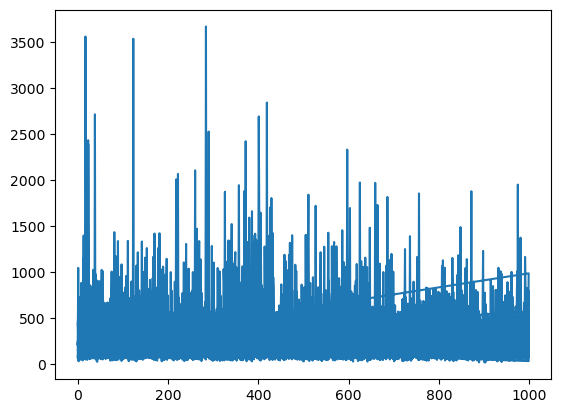

In [121]:
df['words_length'].plot()

<Axes: >

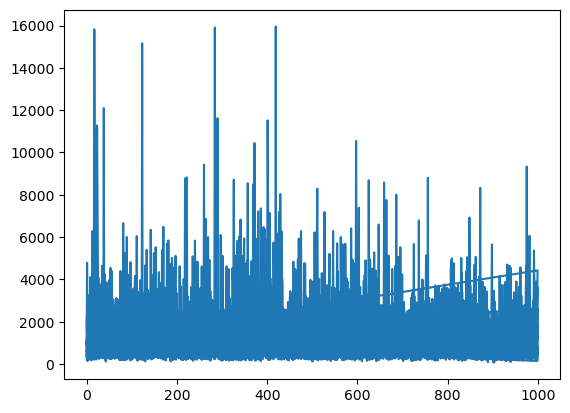

In [122]:
df['letters_length'].plot()

In [ ]:
stopwords.words('arabic')

In [ ]:
import string

string.punctuation


In [97]:
concatenated_text = df['story'].str.cat(sep = ' ')


In [98]:
from collections import Counter

word_freq = {}
def display_word_frequency(text):
    # Tokenize the text into words (assuming words are separated by spaces)
    words = text.split()

    # Count the occurrences of each word using Counter
    word_count = Counter(words)
    global word_freq
    word_freq = word_count
    # Sort the words based on their frequencies in descending order
    sorted_word_frequency = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
    #word_freq = sorted_word_frequency
#     # Display the sorted word frequency
#     for word, frequency in sorted_word_frequency:
#         print(f"{word}: {frequency}")

# Example usage:

import collections

# Find the most frequent words
display_word_frequency(concatenated_text)

most_common_words = dict(word_freq.most_common(20))
# You can change the number '5' to the desired number of words you want to highlight.
    


In [99]:
df.to_csv('data_stemmed.csv',index = False,encoding = 'utf8')

In [100]:
most_common_words # using stemmer

{'مغرب': 23543,
 'ان': 15883,
 'حال': 13497,
 'عمل': 12258,
 'نه': 11587,
 'مغربيه': 10391,
 'ورو': 7957,
 'دول': 7775,
 'رءيس': 7519,
 'الامازيغيه': 7511,
 'جه': 7429,
 'جديد': 6745,
 'ذا': 6494,
 'وطن': 6462,
 'عالم': 6273,
 'خر': 6162,
 'حكومه': 6136,
 'مجلس': 6082,
 'تم': 6044,
 'محمد': 6033}

In [62]:
most_common_words # using lemmitizer

{'غرب': 43603,
 'جمع': 27420,
 'علم': 26926,
 'عمل': 24632,
 'وطن': 18074,
 'حكم': 16273,
 'عدد': 14688,
 'عبر': 14362,
 'حقق': 13905,
 'قدم': 13502,
 'مزغ': 13279,
 'دخل': 12942,
 'نظم': 12867,
 'صحح': 12233,
 'حدث': 12202,
 'مدن': 12070,
 'مرر': 11787,
 'علق': 11419,
 'حول': 11298,
 'شرك': 11247}

حاله
و
انه
ان
عبر
ب

تحتاج تتشال

In [32]:
most_common_words

{'المغرب': 11359,
 'المغربيه': 10338,
 'كورونا': 7699,
 'الامازيغيه': 7511,
 'انه': 7472,
 'المغربي': 6503,
 'حاله': 6270,
 'و': 5900,
 'الحكومه': 5654,
 'محمد': 5379,
 'الوطنيه': 5235,
 'ان': 5205,
 'الوطني': 5098,
 'ب': 4960,
 'المغاربه': 4658,
 'رءيس': 4646,
 'العام': 4629,
 'عبر': 4245,
 'العامه': 4066,
 'عبد': 4002}

## preprocessing can be better

In [34]:
stopwords

<WordListCorpusReader in '/usr/share/nltk_data/corpora/stopwords'>

In [101]:
!pip install Arabic-Stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 7.8 MB/s eta 0:00:0000:01


In [102]:
import arabicstopwords.arabicstopwords as stp

In [108]:
# if 'ان'in stp.stopwords_list():
#     print("Yes")

In [94]:
def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    
    ## Convert text to lowercases
    text = text.lower()
    
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming not lemitize
    text = stem(text,False)
    
    text = re.sub(r'\bو\b','',text)
    
    return text
    

In [95]:

#Applying preproessing
df[string_columns ] =  df[string_columns ].applymap(clean_text)

In [96]:
df.head(5)

,title,author,story,topic,date
0,شهاد طبيب جراح ورط قنصل تر صبع مس,هسبريس من الدار البيضاء,قرر غرفه جناءيه محكم استءناف مدين دار بيضاء مو...,faits-divers,2020-10-02 20:08:00
1,حباط هريب طن حشيش اكادير,رشيد بيجيكن من أكادير,تمكن مصلحه ولاءيه شرطه قضاءيه مدين كادير ضوء م...,faits-divers,2020-10-02 19:37:00
2,مين من صويره سقط شبك هجر ظامي,ابراهيم مغراوي من مراكش,اوقف عناصر رق شرطه قضاءيه منطقه اقليميه امن مد...,faits-divers,2020-10-02 18:35:00
3,تلميذ زاكور تهم زوج خت استغلال جنسي,هسبريس من زاكورة,شف مصدر من مسءول تلميذه متحدره جماع نزول اقليم...,faits-divers,2020-10-02 14:20:00
4,حجار ريم مزيف ورط شخاص مدين كادير,رشيد بيجيكن من أكادير,تمكن عناصر مصلحه ولاءيه شرطه قضاءيه مدين كادير...,faits-divers,2020-10-02 10:05:00


# Encoding target column (topic ) using label encoding

Assigns unique integer number for each unique value in topic column

In [155]:


# Sample data


# Using Label Encoding
label_map = {label: idx for idx, label in enumerate(df['topic'].unique())}
df['Category_Encoded'] = df['topic'].map(label_map)


In [173]:
label_map

{'faits-divers': 0,
 'art-et-culture': 1,
 'regions': 2,
 'sport': 3,
 'medias': 4,
 'economie': 5,
 'tamazight': 6,
 'societe': 7,
 'orbites': 8,
 'politique': 9,
 'marocains-du-monde': 10}

## Generating Embedding from text data using tf-idf

In [199]:
unique_words_count = df['story'].str.split().apply(set).apply(len)

print(f'number of unique words in data is : {unique_words_count.sum()})

1802792


In [203]:
unique_words_count.sum()/200

9013.96

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 9013
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['story'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the original DataFrame and the TF-IDF DataFrame
#df = pd.concat([df, tfidf_df], axis=1)

# Print the updated DataFrame

In [207]:
tfidf_df.head(5)

,ءا,ءاخذ,ءاد,ءازر,ءام,ءت,ءتلاف,ءتم,ءتما,ءثث,...,ⵜⵎⴰⵣⵉⵖⵜ,ⵜⵓⵙⵏⴰ,ⵜⵓⵜⵍⴰⵢⵜ,ⵢⴰⵏ,ⵢⴰⵜ,ⵢⵉⵍⵉ,ⵢⵉⵡⵉ,ﻋﻠﻰ,ﻓﻲ,ﻣﻦ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA for dimension reduction

In [197]:
x_train.shape

(11000, 2500)

[ 1.87  3.15  4.26 ... 93.49 93.49 93.49]


Text(0, 0.5, '% Variance explained')

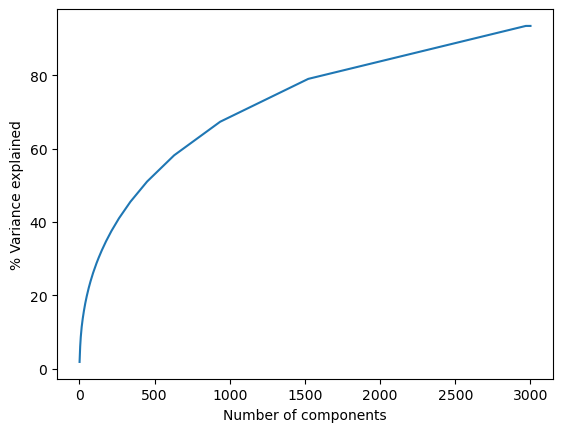

In [208]:
''' #### Dimension Reduction #### '''
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Subsetting data for X and y
TargetVariable='Class Category'
Predictors='story'

X=tfidf_df.to_numpy()
y=y_train

#Any number  less than the total number of columns in the original data to try
# I chose 5000 just to check if saturation happens before 5000 components or not.
NumComponents=3000
pca = PCA(n_components=NumComponents)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)


#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

# Look for the elbow in the plot
plt.plot( range(1,len(var_explained_cumulative)+1), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

## This looks like we need at least 3500 component

In [209]:
NumComponents=4000
pca = PCA(n_components=NumComponents)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

In [210]:
x_train = reduced_X

In [174]:
# tfidf_df.to_csv('tfData.csv',index = False)

In [144]:
test_dataframe = pd.read_csv('/kaggle/working/test.csv')

In [211]:
test_tfidf_matrix = tfidf_vectorizer.transform(test_dataframe['story'])

# Convert the TF-IDF matrix into a DataFrame
test_tfidf_df = pd.DataFrame(test_tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF features for the test data


In [212]:
test_tfidf_df

,ءا,ءاخذ,ءاد,ءازر,ءام,ءت,ءتلاف,ءتم,ءتما,ءثث,...,ⵜⵎⴰⵣⵉⵖⵜ,ⵜⵓⵙⵏⴰ,ⵜⵓⵜⵍⴰⵢⵜ,ⵢⴰⵏ,ⵢⴰⵜ,ⵢⵉⵍⵉ,ⵢⵉⵡⵉ,ﻋﻠﻰ,ﻓﻲ,ﻣﻦ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
labels = df['Category_Encoded'].to_numpy()
y_train = labels

In [213]:
x_test = pca_fit.transform(test_tfidf_df.to_numpy()) 

In [176]:

test_dataframe['Category_Encoded'] = test_dataframe['topic'].map(label_map)


In [177]:
y_test = test_dataframe['Category_Encoded'].to_numpy()

In [154]:
df

,title,author,story,topic,date,words_length,letters_length
0,شهاد طبيب جراح رط قنصل تر صبع مس,هسبريس من الدار البيضاء,قرر غرف جناء مح استءناف مد دار يضاء مواصل مناق...,faits-divers,2020-10-02 20:08:00,150,635
1,حباط هريب طن حشيش كادير,رشيد بيجيكن من أكادير,مك مصلح اء شرط قضاء مد ادير ضوء معلوم دقيق فر ...,faits-divers,2020-10-02 19:37:00,118,523
2,مي صوير سقط شب هجر ظام,ابراهيم مغراوي من مراكش,وقف عناصر رق شرط قضاء منطق قليم من مد صوير خمي...,faits-divers,2020-10-02 18:35:00,92,410
3,تلميذ زاكور هم زوج خت استغلال جنس,هسبريس من زاكورة,شف مصدر مسءول تلميذ متحدر جماع زول قليم زاكور ...,faits-divers,2020-10-02 14:20:00,93,415
4,حجار ريم مزيف رط شخاص مد ادير,رشيد بيجيكن من أكادير,مك عناصر مصلح اء شرط قضاء مد ادير اربعاء قيف ش...,faits-divers,2020-10-02 10:05:00,78,335
...,...,...,...,...,...,...,...
995,استاذ دريس عرب ابناء مغارب عالم,هسبريس من الرباط,عل زار رب طن كو مه عليم عال حث علم قطاع رب طن ...,marocains-du-monde,2018-05-12 23:25:00,42,191
996,حروش قاض مغرب تصر عدل محكم عمان,هسبريس ـ ط.العاطفي | أ.الخياري,فظ سم عرب حروش سلط عم مقترن عبار ضيل قاض طيل س...,marocains-du-monde,2018-05-12 06:00:00,527,2329
997,غزل صيابر مغرب عتل قم مال عمال حر,هسبريس ـ ط.العاطفي | أ.الخياري,طال مقام مغرب غزل صيابر جرب هجر صل عد يف قام ع...,marocains-du-monde,2018-05-11 06:00:00,354,1574
998,هشام سمار صحاف مغرب فتح روا مار,هسبريس ـ ط.العاطفي | أ.الخياري,عيش هشام سمار خر ين عقد ثالث مختار ربط مرحل عم...,marocains-du-monde,2018-05-10 06:00:00,374,1682


# Classifiers Design

In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer

In [ ]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

In [183]:

from sklearn import metrics

from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score

### Results based on 9013 max_features tf-idf features with PCA components = 3700

### RandomForest Classifier

Testing accuracy   : 13.454545454545455 %
MSE [TEST]          : 28.01181818181818
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.13454545454545455
recall    :  0.13454545454545455
f1_score  :  0.13454545454545455


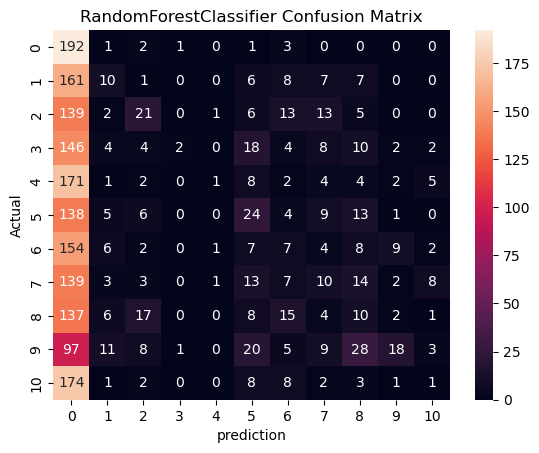

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000
          10       1.00      1.00      1.00      1000

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000

              precision    recall  f1-score   support

           0       0.12      0.96      0.21       200
           1       0.20      0.05      0.08       200
           2       0.31 

In [214]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = RandomForestClassifier(n_jobs = -1).fit(x_train, y_train)
get_accuracy('RandomForestClassifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)

## 

## Precision, Recall, and F1-score are commonly used evaluation metrics for multi-class text classification tasks
**
this small table explains the confusion matrix :

                Predicted Class 1   Predicted Class 2   Predicted Class 3
    Actual Class 1         TP(1,1)             FP(1,2)             FP(1,3)

    Actual Class 2         FP(2,1)             TP(2,2)             FP(2,3)

    Actual Class 3         FP(3,1)             FP(3,2)             TP(3,3)


* Diagonal of the confustion matrix represents true positive prediction for each class at column j

Examples : 

percision for class 1 = Tp( class 1 )  / ( Tp( class 1 ) + sum ( row1)
Recall for class 1 = TP(class 1) / (TP(class 1) + sum(FP(j,i) for j ≠ i))

**recall** = measures the ability of the classifier to identify correct topics of a specific topic correctly.

**pericison** = measures the accuracy of correct predictions for a specific class

**f1-score** = get a score based on percision and recall to estimate model performance


# Decsion Tree Classifier

In [215]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()
# Perform cross-validation using 5 folds
cross_val_scores = cross_val_score(dtc, X_train_psd, labels, cv=10,n_jobs = -1)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Cross-validation scores: [0.61454545 0.62272727 0.59545455 0.64727273 0.64727273 0.62545455
 0.61636364 0.64       0.60818182 0.60545455]
Mean score: 62.227272727272734
Standard deviation: 0.016940586503258376


### Results based on 2500 tf-idf features without PCA

In [ ]:
labels = df['Category_Encoded'].to_numpy()
y_train = labels

### Results based on 2500 tf-idf features without PCA

## Random Forest

In [158]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_jobs = -1 , max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
# Perform cross-validation using 10 folds
cross_val_scores = cross_val_score(rf_classifier, X_train_psd, labels, cv=10)


# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Cross-validation scores: [0.80545455 0.80272727 0.80636364 0.79090909 0.82909091 0.81727273
 0.82727273 0.83090909 0.79818182 0.80090909]
Mean score: 81.0909090909091
Standard deviation: 0.013483997249264846


## Hyper parameter tuning using grid search

In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],}
# Perform grid search with cross-validation
rf_classifier = RandomForestClassifier(n_jobs = -1)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=10)

# Fit the grid search to the data
grid_search.fit(X_train_psd,  labels)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Decsion Tree Classifier

In [163]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()
# Perform cross-validation using 5 folds
cross_val_scores = cross_val_score(dtc, X_train_psd, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

Cross-validation scores: [0.62545455 0.61727273 0.59727273 0.63545455 0.65454545 0.62272727
 0.61636364 0.63272727 0.61454545 0.59727273]
Mean score: 62.13636363636363
Standard deviation: 0.016420356243807673


# XGBClassifier

In [167]:
import xgboost as xgb

# create the XGBoost model
xgb= xgb.XGBClassifier(objective='multi:softmax', num_class=11, n_estimators=50)
# Perform cross-validation using 5 folds
cross_val_scores = cross_val_score(xgb, X_train_psd, labels, cv=10,n_jobs = -1)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Cross-validation scores: [0.81181818 0.81272727 0.81636364 0.79636364 0.84636364 0.82090909
 0.83363636 0.84363636 0.82090909 0.81090909]
Mean score: 82.13636363636365
Standard deviation: 0.014822642942527236


# SVC

In [168]:
# Create an SVM classifier
svm = SVC(kernel='rbf', C=0.5, gamma=0.1)

# Perform cross-validation using 10 folds
cross_val_scores = cross_val_score(svm, X_train_psd, labels, cv=10,n_jobs = -1)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Cross-validation scores: [0.79636364 0.79818182 0.79454545 0.77909091 0.83181818 0.80545455
 0.80181818 0.84272727 0.79818182 0.81181818]
Mean score: 80.60000000000001
Standard deviation: 0.017713047905871613


### Model Evaluation

In [ ]:
test_dataframe

Testing accuracy   : 22.045454545454547 %
MSE [TEST]          : 23.37090909090909
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.22045454545454546
recall    :  0.22045454545454546
f1_score  :  0.22045454545454546


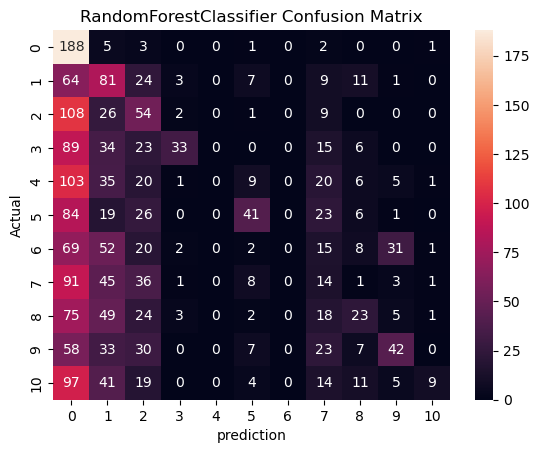

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000
          10       1.00      1.00      1.00      1000

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000

              precision    recall  f1-score   support

           0       0.18      0.94      0.31       200
           1       0.19      0.41      0.26       200
           2       0.19 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = RandomForestClassifier(n_jobs = -1).fit(x_train, y_train)
get_accuracy('RandomForestClassifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)

Testing accuracy   : 21.09090909090909 %
MSE [TEST]          : 25.685909090909092
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.2109090909090909
recall    :  0.2109090909090909
f1_score  :  0.2109090909090909


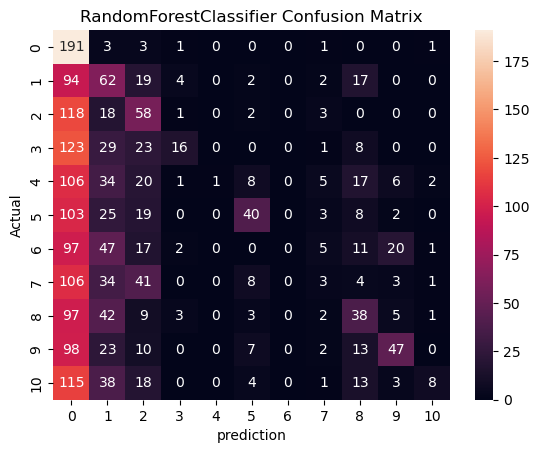

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000
          10       1.00      1.00      1.00      1000

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000

              precision    recall  f1-score   support

           0       0.15      0.95      0.26       200
           1       0.17      0.31      0.22       200
           2       0.24 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = RandomForestClassifier(n_jobs = -1).fit(x_train, y_train)
get_accuracy('RandomForestClassifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)

### Naive Base

In [186]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

Testing accuracy   : 30.363636363636363 %
MSE [TEST]          : 21.086363636363636
Training accuracy  : 82.04545454545455 %
MSE [TRAIN]         : 3.0095454545454547
precision :  0.30363636363636365
recall    :  0.30363636363636365
f1_score  :  0.30363636363636365


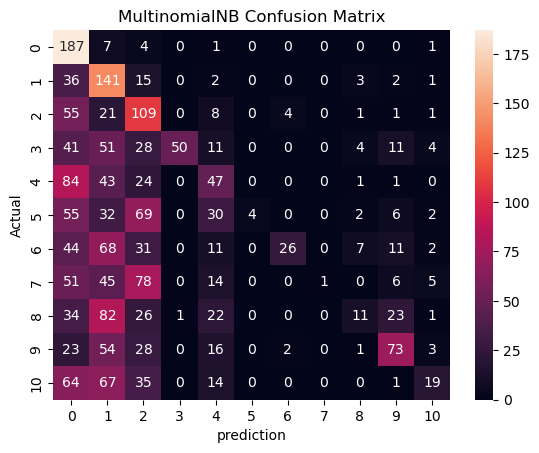

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1000
           1       0.77      0.90      0.83      1000
           2       0.81      0.76      0.78      1000
           3       0.99      0.98      0.99      1000
           4       0.78      0.83      0.81      1000
           5       0.79      0.90      0.84      1000
           6       0.91      0.86      0.88      1000
           7       0.72      0.64      0.68      1000
           8       0.74      0.62      0.68      1000
           9       0.74      0.81      0.77      1000
          10       0.84      0.80      0.82      1000

    accuracy                           0.82     11000
   macro avg       0.82      0.82      0.82     11000
weighted avg       0.82      0.82      0.82     11000

              precision    recall  f1-score   support

           0       0.28      0.94      0.43       200
           1       0.23      0.70      0.35       200
           2       0.24 

In [187]:
trained_clf_multinomial_nb = MultinomialNB().fit(x_train, y_train)
get_accuracy('MultinomialNB',trained_clf_multinomial_nb,x_train, y_train, x_test, y_test)

### Linear Svc


Testing accuracy   : 11.5 %
MSE [TEST]          : 19.007272727272728
Training accuracy  : 96.97272727272728 %
MSE [TRAIN]         : 0.43318181818181817
precision :  0.115
recall    :  0.115
f1_score  :  0.115


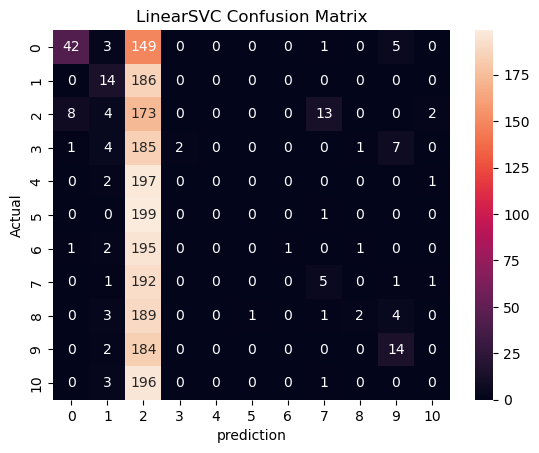

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.98      0.98      0.98      1000
           2       0.96      0.95      0.95      1000
           3       1.00      1.00      1.00      1000
           4       0.99      0.99      0.99      1000
           5       0.96      0.98      0.97      1000
           6       0.98      0.99      0.99      1000
           7       0.94      0.92      0.93      1000
           8       0.95      0.92      0.93      1000
           9       0.95      0.95      0.95      1000
          10       0.97      0.98      0.98      1000

    accuracy                           0.97     11000
   macro avg       0.97      0.97      0.97     11000
weighted avg       0.97      0.97      0.97     11000

              precision    recall  f1-score   support

           0       0.81      0.21      0.33       200
           1       0.37      0.07      0.12       200
           2       0.08 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
trained_clf_svc = LinearSVC(max_iter=2000).fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

### LogisticRegression

Testing accuracy   : 18.045454545454547 %
MSE [TEST]          : 19.886363636363637
Training accuracy  : 90.48181818181818 %
MSE [TRAIN]         : 1.4775454545454545
precision :  0.18045454545454545
recall    :  0.18045454545454545
f1_score  :  0.18045454545454545


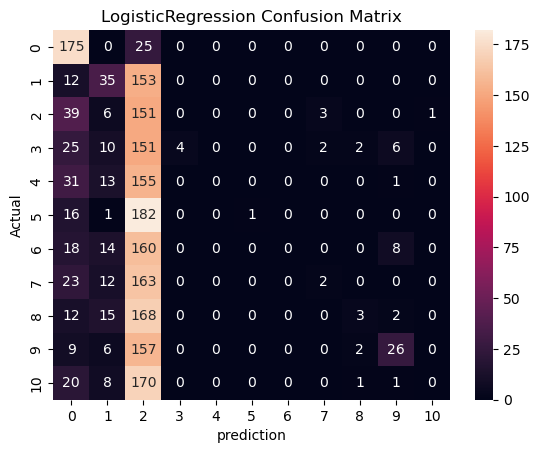

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1000
           1       0.91      0.95      0.93      1000
           2       0.88      0.88      0.88      1000
           3       0.99      0.99      0.99      1000
           4       0.96      0.94      0.95      1000
           5       0.88      0.93      0.90      1000
           6       0.97      0.95      0.96      1000
           7       0.82      0.79      0.81      1000
           8       0.82      0.79      0.80      1000
           9       0.85      0.87      0.86      1000
          10       0.91      0.91      0.91      1000

    accuracy                           0.90     11000
   macro avg       0.90      0.90      0.90     11000
weighted avg       0.90      0.90      0.90     11000

              precision    recall  f1-score   support

           0       0.46      0.88      0.60       200
           1       0.29      0.17      0.22       200
           2       0.09 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
trained_clf_LogisticRegression = LogisticRegression(max_iter=200).fit(x_train, y_train)
get_accuracy('LogisticRegression',trained_clf_LogisticRegression,x_train, y_train, x_test, y_test)

### Gradient Boost


In [ ]:
trained_clf_GradientBoost=GradientBoostingClassifier(n_jobs =-1)
trained_clf_GradientBoost.fit(x_train,y_train)
get_accuracy('gboost',trained_clf_GradientBoost,x_train, y_train, x_test, y_test)

Took too long

# conclousion 

* We can improve accuracy by using deep neurla network like multi layer perceptron
* Transformer model like bert
* Using pre-trained model on more bigger data 
* Using features like text length and the date of the story
* Hyper parameter fine tuning